In [9]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
path = "C:\\Users\\winsa\\B_Pandas\\main.xlsx"
df = pd.read_excel(path)

In [11]:
# Functions for plotting
def matplot_lib_stacked(df, x, y1, y2, y3):
    df.plot(x=x, y=[y1, y2, y3], kind='bar', stacked=True)
    plt.xlabel(x)
    plt.ylabel('Values')
    plt.title('Matplotlib : Stacked Bar Chart')
    plt.show()

In [18]:
def seaborn_stacked(df, x, y1, y2, y3):
    df_melted = pd.melt(df, id_vars=x, value_vars=[y1, y2, y3], var_name='Category', value_name='Value')
    sns.barplot(data=df_melted, x=x, y='Value', hue='Category', estimator=sum, errorbar=None)
    plt.xlabel(x)
    plt.ylabel('Values')
    plt.title('Seaborn : Stacked Bar Chart')
    plt.show()

In [22]:
def plotly_stacked(df, x, y1, y2, y3):
    df_melted = df.melt(id_vars=x, value_vars=[y1, y2, y3], var_name='Category', value_name='Value')
    chat = px.bar(df_melted, x=x, y='Value', color='Category', width=800,
              height=600, title='Plotly : Stacked Bar Chart')
    chat.update_layout(barmode='stack')
    chat.show()

In [14]:
df['report_date_time']= pd.to_datetime(df['report_date_time'],format='%d-%m-%Y %H:%M')
df_yearly = df.groupby(df['report_date_time'].dt.year)[['me_con', 'ae_con', 'bl_con']].sum().reset_index()

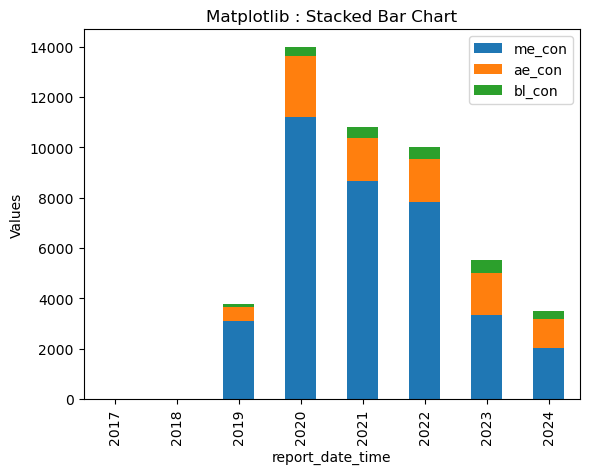

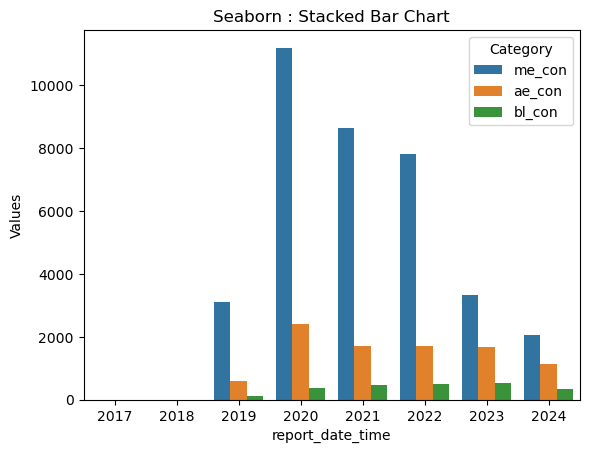

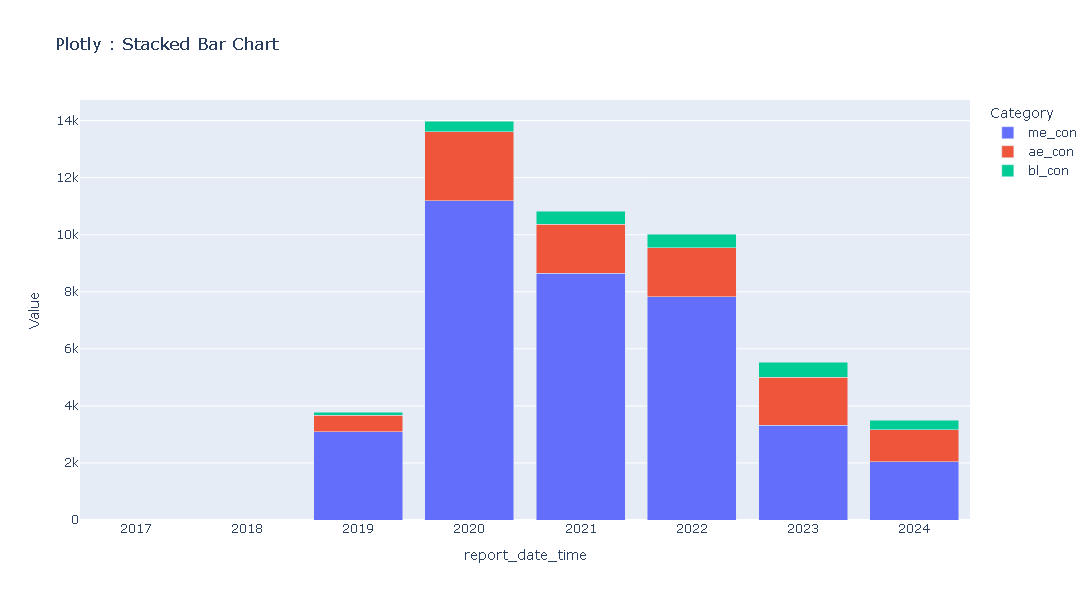

In [24]:
matplot_lib_stacked(df_yearly, 'report_date_time', 'me_con', 'ae_con', 'bl_con')
seaborn_stacked(df_yearly, 'report_date_time', 'me_con', 'ae_con', 'bl_con')
plotly_stacked(df_yearly, 'report_date_time', 'me_con', 'ae_con', 'bl_con')